<a href="https://colab.research.google.com/github/SaintSeong/SpartaCoding_AI/blob/main/CrossEntropy_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

In [ ]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)
    # Gemini를 통한 확인
    # CrossEntropy는 출력으로 나올 수 있는 각각의 Label에 대한 확률을 계산하므로 1에서 10으로 변경을 해야 동작

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x

In [ ]:
model = Model(28 * 28 * 1, 1024)

from torch.optim import SGD

lr = 0.001
model = model.to(device)

optimizer = SGD(model.parameters(), lr=lr)

In [ ]:
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

In [ ]:
n_epochs = 100
train_accuracy = []
test_accuracy = []

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model(inputs)
    loss = nn.CrossEntropyLoss()(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  train_accuracy.append(accuracy(model, trainloader))
  test_accuracy.append(accuracy(model, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 540.5972092151642
Epoch   1 | Loss: 538.6832387447357
Epoch   2 | Loss: 536.5835056304932
Epoch   3 | Loss: 534.4610223770142
Epoch   4 | Loss: 532.2522830963135
Epoch   5 | Loss: 529.8838317394257
Epoch   6 | Loss: 527.3132240772247
Epoch   7 | Loss: 524.5240354537964
Epoch   8 | Loss: 521.4868805408478
Epoch   9 | Loss: 518.1816501617432
Epoch  10 | Loss: 514.5376963615417
Epoch  11 | Loss: 510.5424325466156
Epoch  12 | Loss: 506.05333828926086
Epoch  13 | Loss: 500.2857494354248
Epoch  14 | Loss: 493.4950828552246
Epoch  15 | Loss: 486.0197494029999
Epoch  16 | Loss: 477.69554018974304
Epoch  17 | Loss: 468.6491314172745
Epoch  18 | Loss: 458.6733065843582
Epoch  19 | Loss: 447.82991349697113
Epoch  20 | Loss: 436.28466832637787
Epoch  21 | Loss: 424.1902896165848
Epoch  22 | Loss: 411.91210758686066
Epoch  23 | Loss: 399.48710322380066
Epoch  24 | Loss: 387.38403964042664
Epoch  25 | Loss: 375.75821936130524
Epoch  26 | Loss: 364.9493678808212
Epoch  27 | Loss: 35

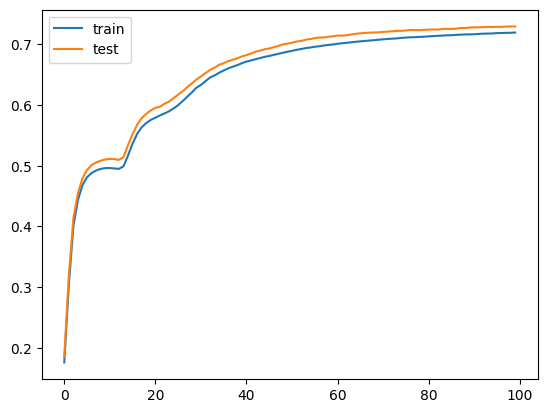

In [ ]:
plot_acc(train_accuracy, test_accuracy)